In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [2]:
data = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


**Taskes:**

1.   Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [3]:
# To check for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
# To get statistics of numerical columns
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
# To check for duplicate data
# data.duplicated() # outputs boolean True or False
print(data.duplicated().loc[data.duplicated()]) # outputs only True meaning those rows that are identified as duplicate(s)

113    True
dtype: bool


In [6]:
# To check the duplicated rows while displaying the entries in all columns
data[data.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [7]:
# To investigate more about this duplicate entry
data[(data['Price'] == 24950) & (data['Age_08_04'] == 8)]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


Based on the duplicate check, it appears there is one duplicate row

In [8]:
#To drop all duplicated rows
data_no_duplicates = data.drop_duplicates()

In [9]:
# To check the duplicated rows
data_no_duplicates[data_no_duplicates.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


In [10]:
# To check how many missing values ( NaN , None ) are there in each column
data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [11]:
for a in data['Cylinders']:
  if a != 4:
    print(a)

Duplicate rows are removed and there are no 'Null' or 'NaN' entries.

**Data Visulaization**

In [12]:
import seaborn as sea

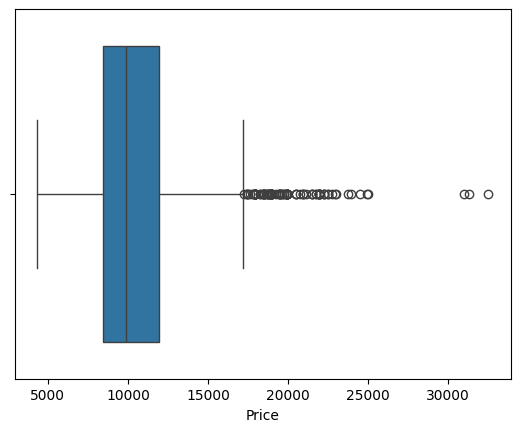

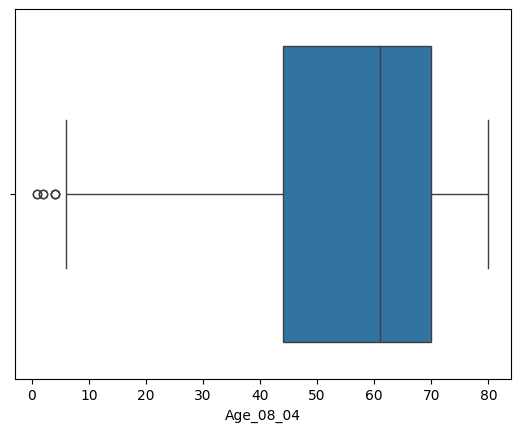

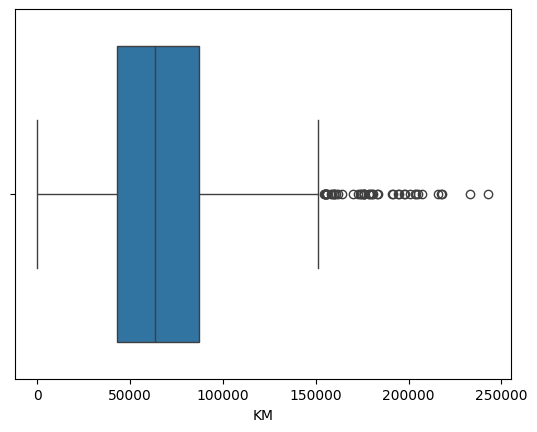

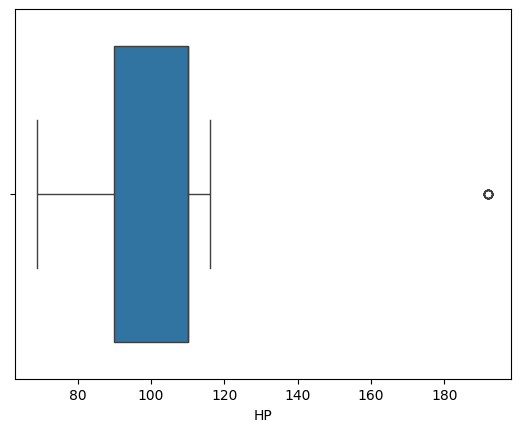

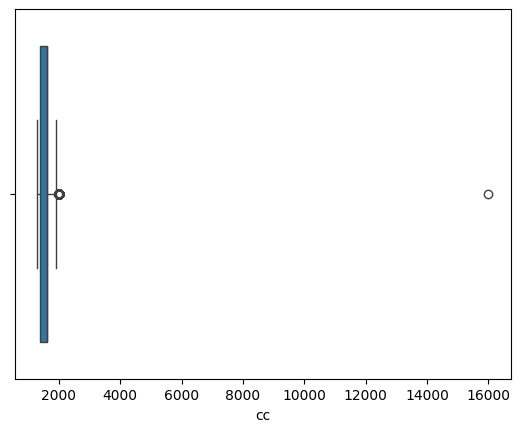

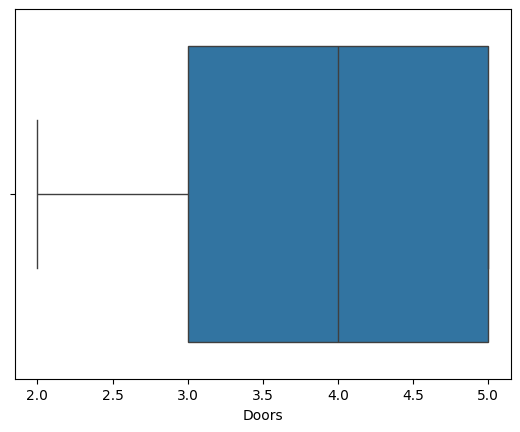

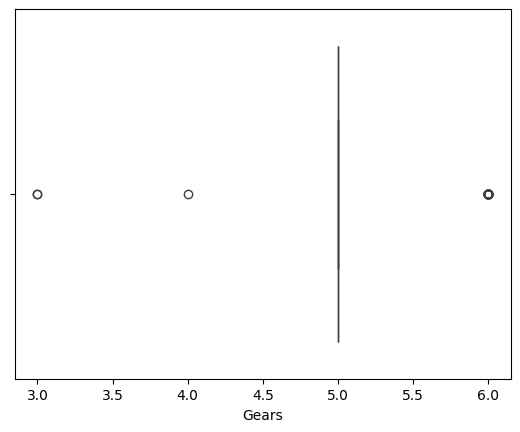

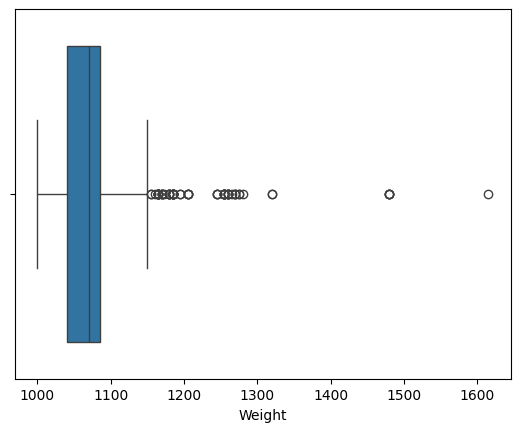

In [13]:
# To check outliers in columns
numrical_columns = data_no_duplicates.select_dtypes(include = np.number).columns
# print(numrical_columns)
for c in numrical_columns:
    if c != 'Automatic' and c != 'Cylinders': # because based on the input data decription and statistics information Automatic is a binary dataset and cylinder has the same value in all the rows
      sea.boxplot(x = data_no_duplicates[c])
      plt.show()
# The below plots show the maximum, the minimum, Quartiles 1 and 3, IQR and the median

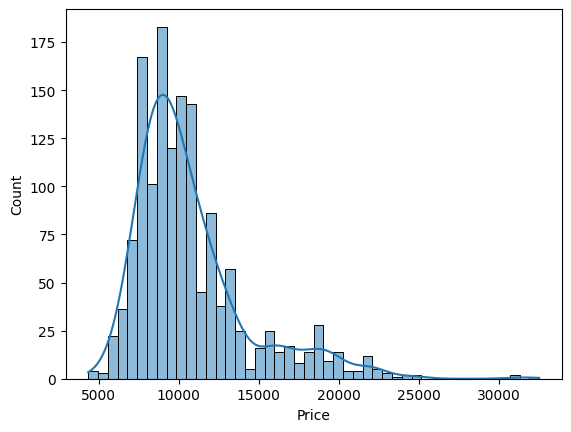

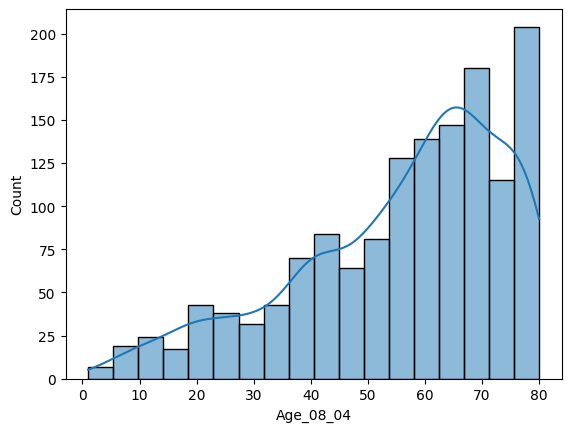

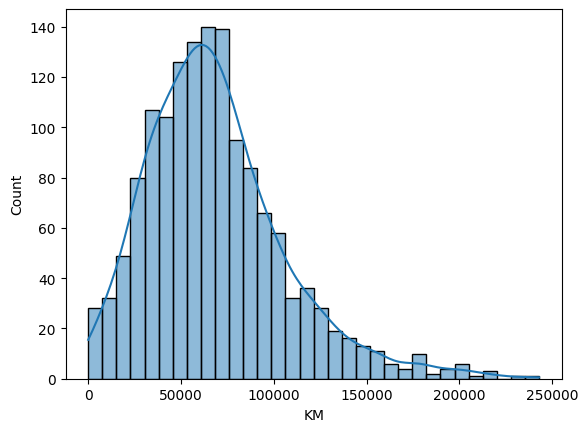

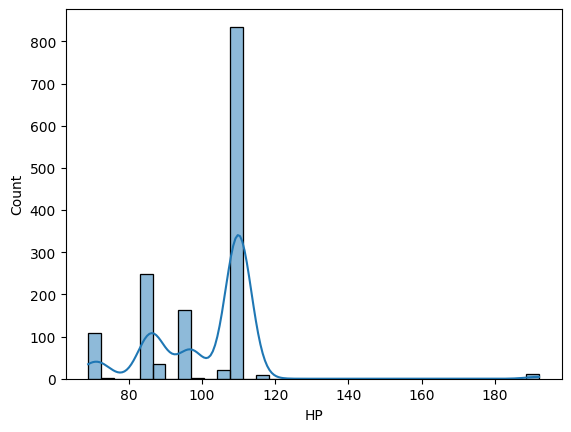

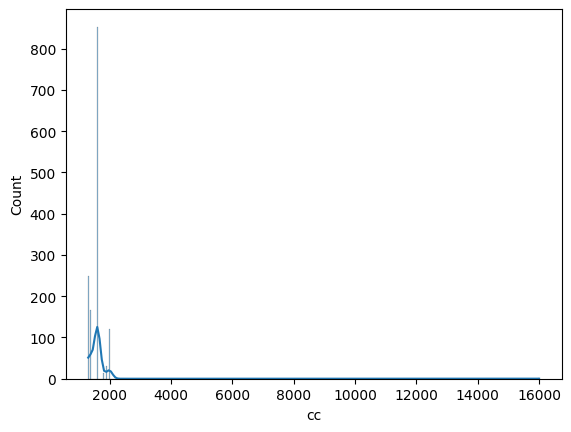

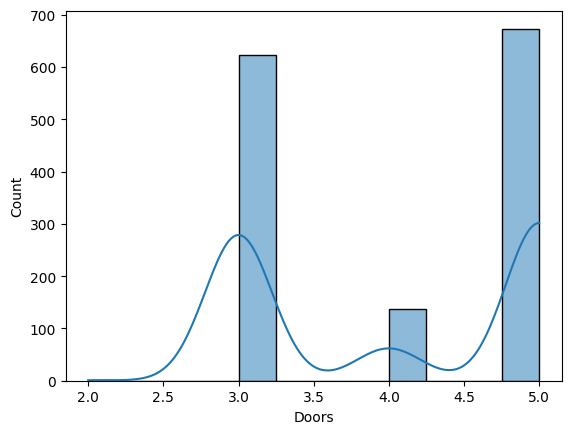

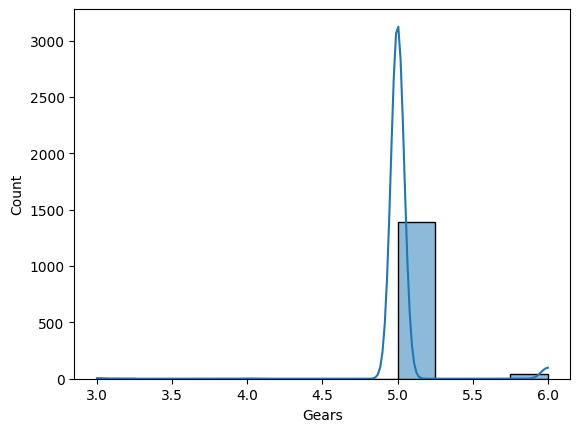

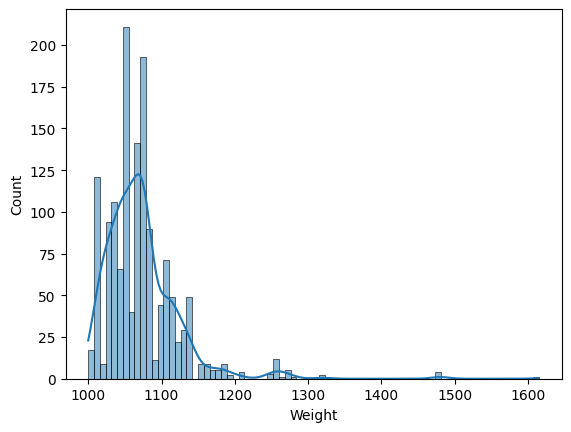

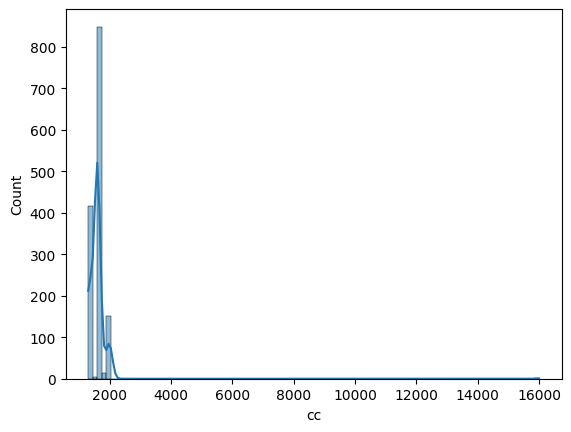

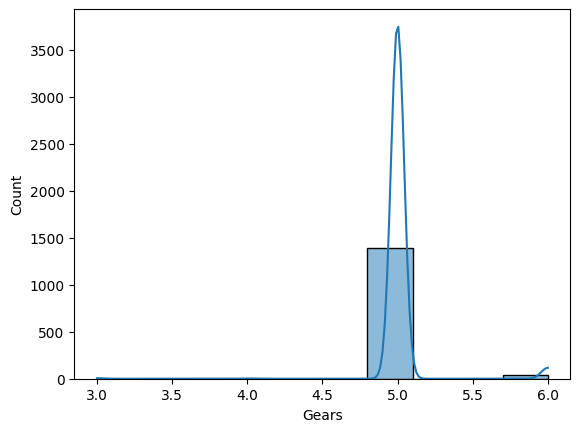

In [14]:
for c in numrical_columns:
  if c != 'Automatic' and c != 'Cylinders' and 'cc' and 'Gears':
    sea.histplot(x = data_no_duplicates[c], kde = True)
    plt.show()

# Histagram with density distribution of 'cc' data
sea.histplot(x = data_no_duplicates['cc'], kde = True, bins = 100)
plt.show()

# Histagram with density distribution of 'Gears' data
sea.histplot(x = data_no_duplicates['Gears'], kde = True, bins = 10)
plt.show()

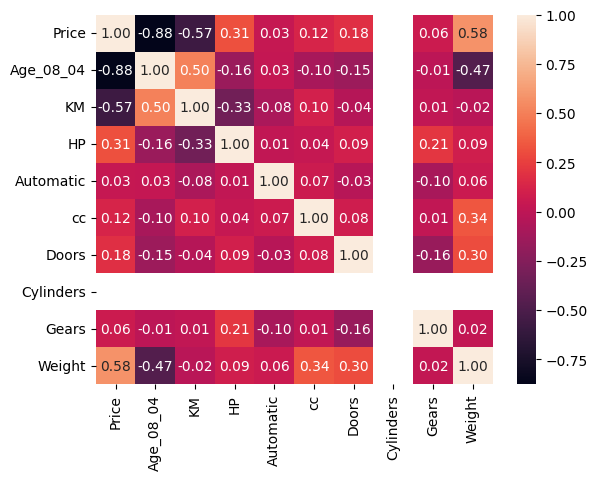

In [15]:
# To check for correlation between variables (columns)
data_nc_no_duplicates = data_no_duplicates.select_dtypes(exclude = object)
sea.heatmap(data_nc_no_duplicates.corr(), annot = True, fmt = '.2f')
plt.show()

*   It is interesting to note that Cylinders has no values or color (blank) because it is a constant and so it does not vary with respect to other variables.

*   Price variable is negatively correlated with age and KM as can be expected, and positively correlated with weight.

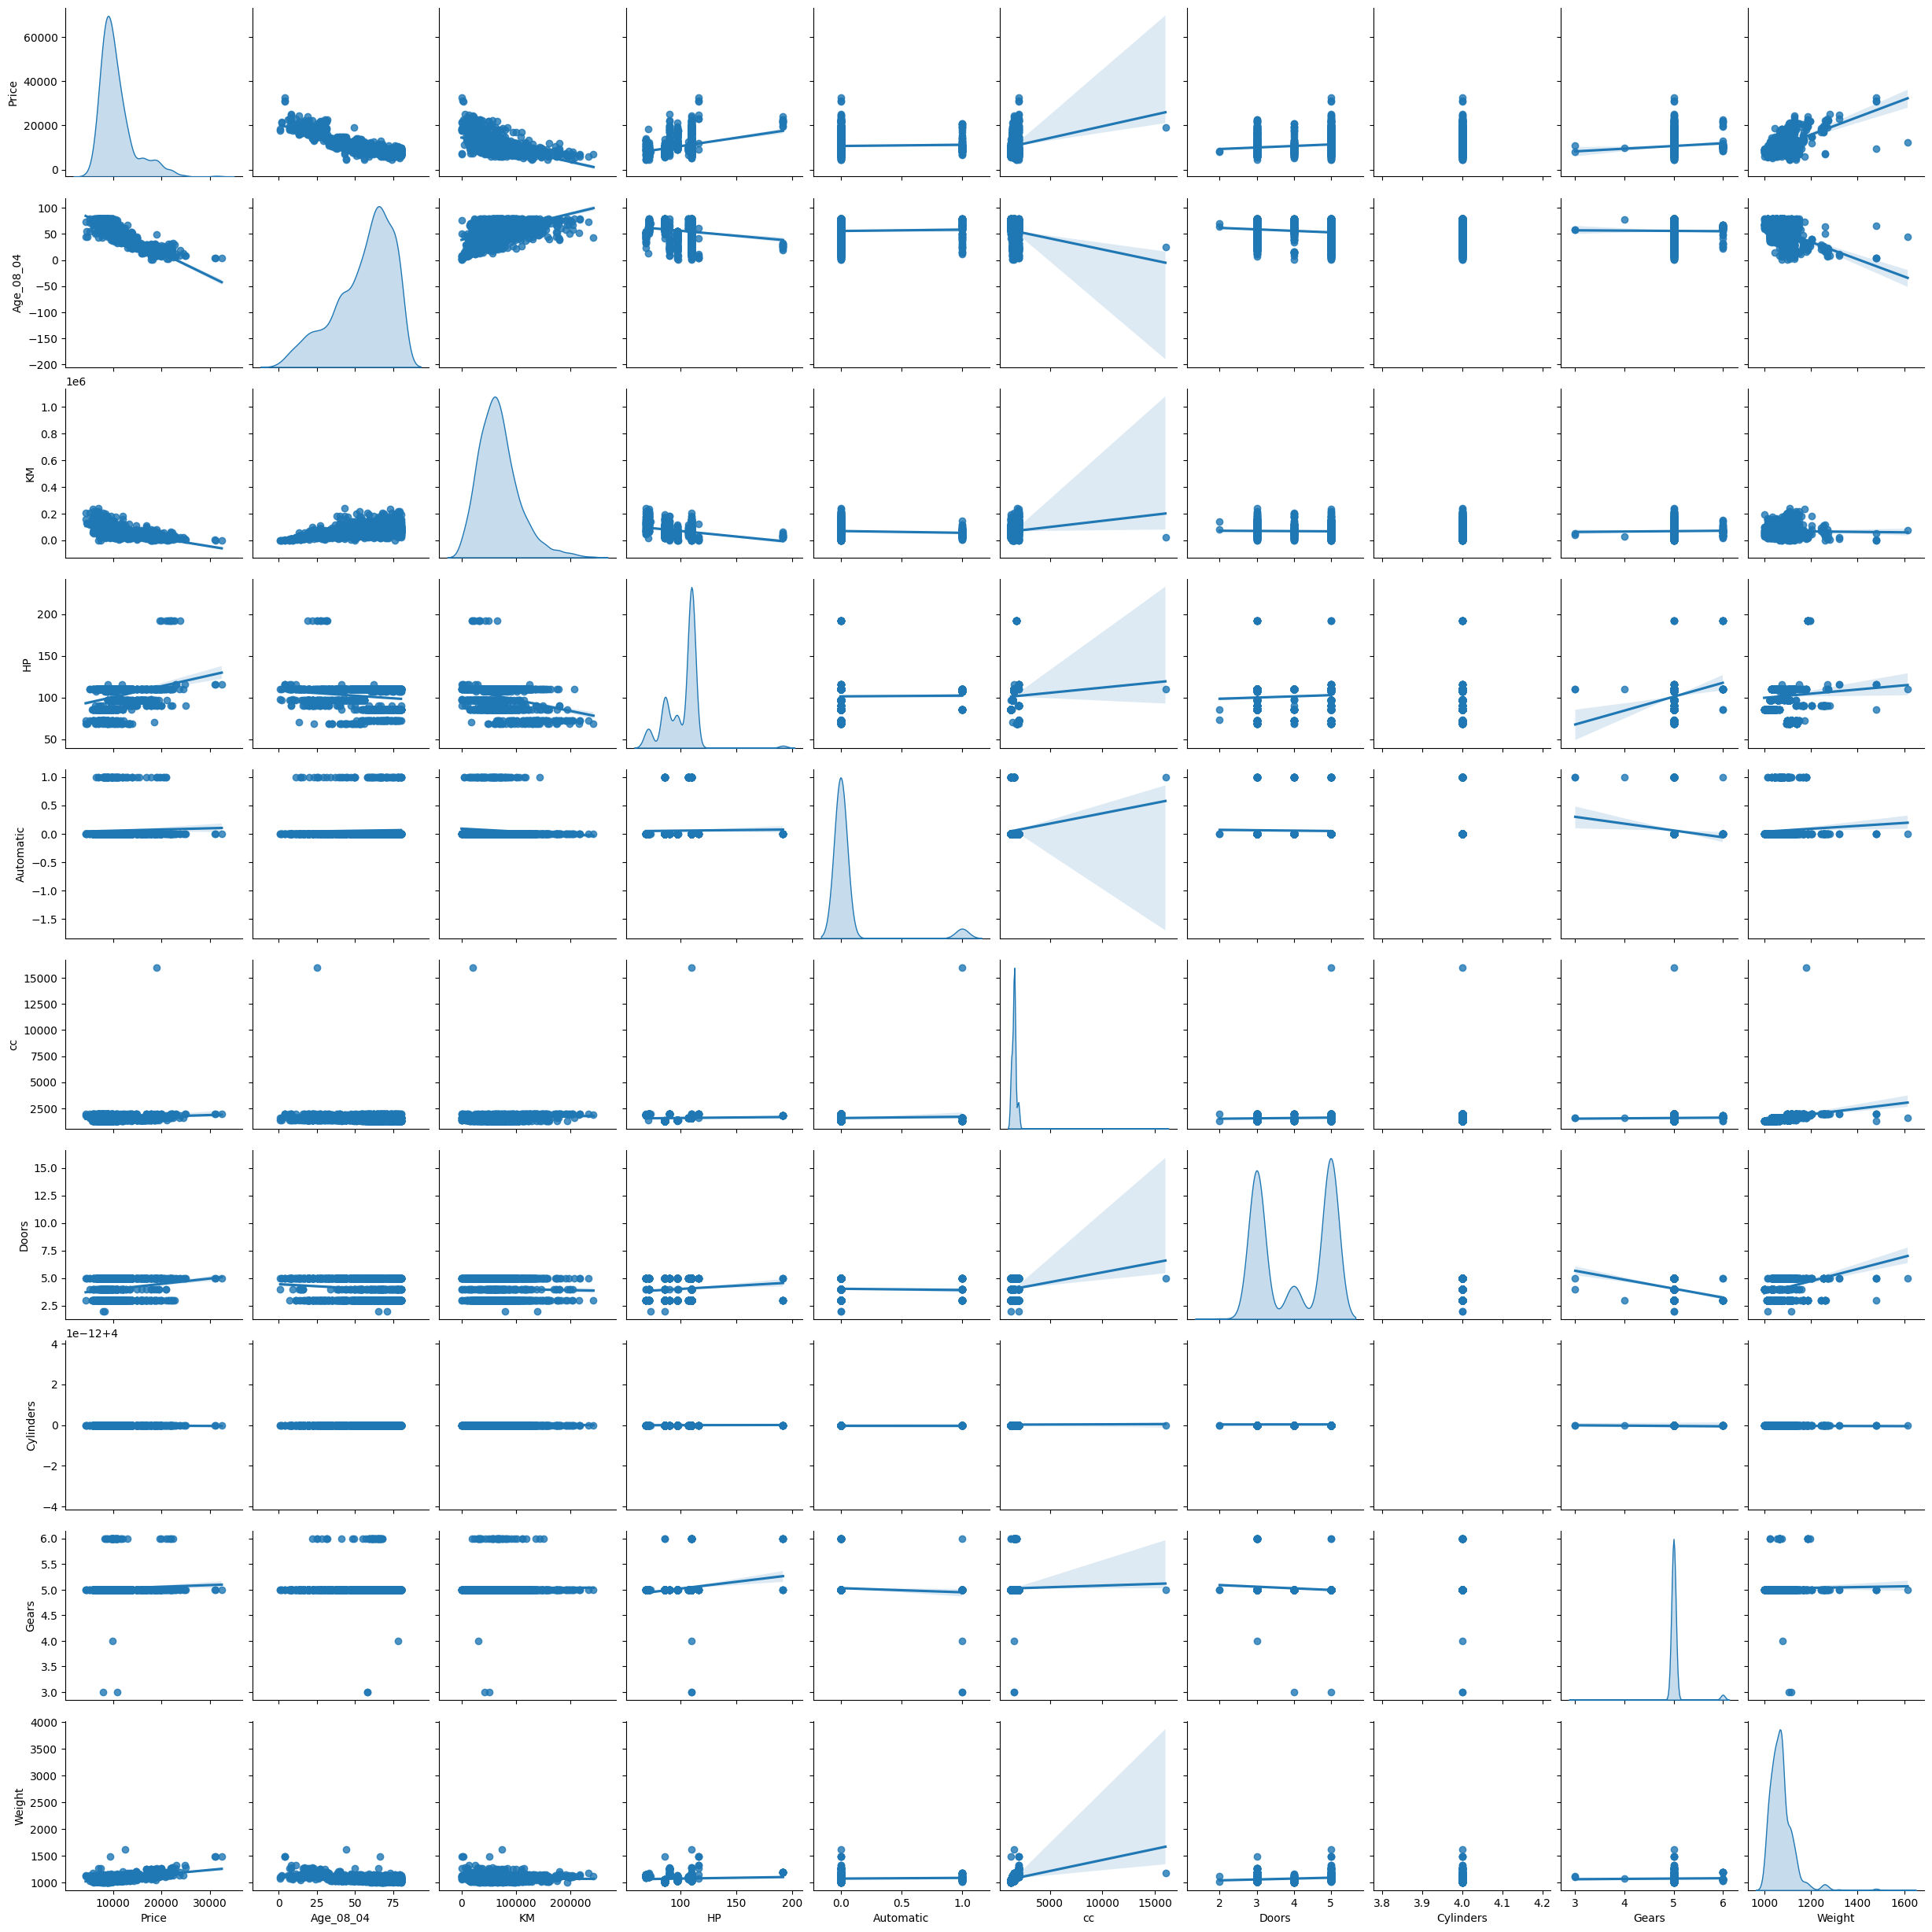

In [16]:
# To check for correlations visually
sea.pairplot(data_nc_no_duplicates, kind = 'reg', diag_kind = 'kde')
plt.show()

2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [17]:
from sklearn.model_selection import train_test_split as tts

X_train_01, x_test_01, Y_train_01, y_test_01 = tts(data_nc_no_duplicates.drop('Price', axis = 1), data_nc_no_duplicates['Price'], test_size = 0.2, random_state = 42)
X_train_01.shape, Y_train_01.shape, x_test_01.shape, y_test_01.shape

((1148, 9), (1148,), (287, 9), (287,))

3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

**Model 1**: Fitting the Multiple Linear Regression model using LinearRegression()

In [18]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

In [19]:
mlr01 = LinearRegression()
mlr01.fit(X_train_01, Y_train_01)

LinearRegression()

In [20]:
# Intercept and Coefficient
print('Intercept : ', round(mlr01.intercept_, 2))
print('Coefficient : ', [round(coef, 2) for coef in mlr01.coef_])
print('Training R2 Score : ', round(mlr01.score(X_train_01, Y_train_01), 2))
print('Testing R2 Score : ', round(mlr01.score(x_test_01, y_test_01), 2))

Intercept :  -7696.02
Coefficient :  [np.float64(-121.52), np.float64(-0.02), np.float64(30.79), np.float64(515.19), np.float64(-0.14), np.float64(-22.02), np.float64(0.0), np.float64(437.83), np.float64(20.07)]
Training R2 Score :  0.87
Testing R2 Score :  0.84


The model can be expressed as

Y (Price) = -7696.02 + (-121.52 * Age) + (-0.02 * KM) + (30.79 * HP) + (515.19 * Automatic) + (-0.14 * cc) + (-22.02 * Doors) + (0.0 * Cylinders) + (437.83 * Gears) + (20.07 * Weight)

This means:

** Price decreases with an increase in:
* Age (by 121.52 per year)
* Accumulated kilometers (KM) (by 0.02 per unit increase)
* Cylinder volume (cc) (by 0.14 per unit increase)
* Number of doors (by 22.02 per additional door)

** Price increases with an increase in:
* Horsepower (HP) (by 30.79 per unit increase)
* If the car is automatic (by 515.19)
* Number of gears (by 437.83 per additional gear)
* Weight (by 20.07 per unit increase)

The R2 of 0.87 means about 87% of the variation in Price is due to the given features, but 13% remains unexplained. That missing portion suggests that other factors, not included in the model, may also influence the price. Furthermore, the testing data shows R2 of 0.84 indicates that the model maintains strong predictive power on unseen data. Since training and test R2 values are close (87% and 84%), this suggests that the model generalizes well and is not overfitting. However, to further validate the model, additional techniques such residual analysis, or testing on completely independent datasets should be performed.

In [21]:
#Prediction based on training and testing data
y_pred_train_01 = mlr01.predict(X_train_01)
y_pred_test_01 = mlr01.predict(x_test_01)
mlr01_train = pd.DataFrame({'Actual_train': Y_train_01, 'Predicted_train': y_pred_train_01})
mlr01_test = pd.DataFrame({'Actual_test': y_test_01, 'Predicted_test': y_pred_test_01})
mlr01_train['residual_train'] = mlr01_train['Actual_train'] - mlr01_train['Predicted_train']
mlr01_train['residual_train_square'] = mlr01_train['residual_train'] ** 2
mlr01_test['residual_test'] = mlr01_test['Actual_test'] - mlr01_test['Predicted_test']
mlr01_test['residual_test_square'] = mlr01_test['residual_test'] ** 2
mlr01_test

,Actual_test,Predicted_test,residual_test,residual_test_square
753,9950,10658.827459,-708.827459,5.024364e+05
858,7995,10318.909819,-2323.909819,5.400557e+06
630,7500,9408.252862,-1908.252862,3.641429e+06
1412,9950,9440.900643,509.099357,2.591822e+05
975,8950,8445.220566,504.779434,2.548023e+05
...,...,...,...,...
1113,5750,7202.234465,-1452.234465,2.108985e+06
175,19950,19084.474768,865.525232,7.491339e+05
1428,8450,8005.679865,444.320135,1.974204e+05
298,13995,14065.373943,-70.373943,4.952492e+03


In [22]:
from sklearn import metrics

mlr01_test_AbErr_test = metrics.mean_absolute_error(y_test_01, y_pred_test_01)
mlr01_test_SqErr_test = metrics.mean_squared_error(y_test_01, y_pred_test_01)
mlr01_test_RootSqErr_test = np.sqrt(metrics.mean_squared_error(y_test_01, y_pred_test_01))

print('Mean Absolute Error : ', round(mlr01_test_AbErr_test, 4))
print('Mean Squared Error : ', round(mlr01_test_SqErr_test, 4))
print('Root Mean Squared Error : ', round(mlr01_test_RootSqErr_test, 4))
print('Average Price in the test data is : ', round(np.mean(y_test_01), 4))
print('Typical error in the model mlr01 is (Normalized Root Mean Squared Error) : ', '\n', round((mlr01_test_RootSqErr_test / np.mean(y_test_01)), 4), '% of the average price')

Mean Absolute Error :  989.7281
Mean Squared Error :  1926044.8285
Root Mean Squared Error :  1387.8202
Average Price in the test data is :  10696.3937
Typical error in the model mlr01 is (Normalized Root Mean Squared Error) :  
 0.1297 % of the average price


Based on the metrics calculated for the mlr01 model, the Normalized Root Mean Squared Error is approximatly 0.129% of the mean value, which is genrally considered good as the model explains most variability.

**Model 2**: Fitting the Multiple Linear Regression model using LinearRegression() by including one more variable

In [23]:
# To convert object dtype in to binary using One-Hot Encoding method
data_no_duplicates_02 = pd.get_dummies(data_no_duplicates, columns = ['Fuel_Type'])
data_no_duplicates_02['Fuel_Type_CNG'] = data_no_duplicates_02['Fuel_Type_CNG'].astype(int)
data_no_duplicates_02['Fuel_Type_Diesel'] = data_no_duplicates_02['Fuel_Type_Diesel'].astype(int)
data_no_duplicates_02['Fuel_Type_Petrol'] = data_no_duplicates_02['Fuel_Type_Petrol'].astype(int)
data_no_duplicates_02

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [24]:
# Spliting the dataset into training and testing datasets
X_train_02, x_test_02, Y_train_02, y_test_02 = tts(data_no_duplicates_02.drop('Price', axis = 1), data_no_duplicates_02['Price'], test_size = 0.2, random_state = 42)
X_train_02.shape, Y_train_02.shape, x_test_02.shape, y_test_02.shape

((1148, 12), (1148,), (287, 12), (287,))

In [25]:
mlr02 = LinearRegression()
mlr02.fit(X_train_02, Y_train_02)

LinearRegression()

In [26]:
# Intercept and Coefficient
print('Intercept : ', round(mlr02.intercept_, 2))
print('Coefficient : ', [round(coef, 2) for coef in mlr02.coef_])
print('Training R2 Score : ', round(mlr02.score(X_train_02, Y_train_02), 2))
print('Testing R2 Score : ', round(mlr02.score(x_test_02, y_test_02), 2))

Intercept :  -13868.82
Coefficient :  [np.float64(-121.23), np.float64(-0.02), np.float64(16.08), np.float64(268.82), np.float64(-0.05), np.float64(-88.1), np.float64(0.0), np.float64(455.01), np.float64(26.36), np.float64(-246.42), np.float64(-636.1), np.float64(882.52)]
Training R2 Score :  0.87
Testing R2 Score :  0.82


The model can be expressed as

Y (Price) = -13868.82 + (-121.23 * Age) + (-0.02 * KM) + (16.08 * HP) + (268.82 * Automatic) + (-0.05 * cc) + (-88.1 * Doors) + (0.0 * Cylinders) + (455.01 * Gears) + (26.36 * Weight) + (-246.42 * Fuel_Type_CNG) + (-636.1 * Fuel_Type_Deisel) + (882.52 * Fuel_Type_Petrol)

This means:

** Price decreases with an increase in:
* Age
* Accumulated kilometers (KM)
* Cylinder volume (cc)
* Number of doors
* Fuel type (CNG, Deisel)

** Price increases with an increase in:
* Horsepower (HP)
* If the car is automatic
* Number of gears
* Weight
* Fuel type (Petrol)

The R2 of 0.87 means about 87% of the variation in Price is due to the given features, but 13% remains unexplained. That missing portion suggests that other factors, not included in the model, may also influence the price. Furthermore, the testing data shows R2 of 0.82 indicates that the model maintains strong predictive power on unseen data. Since training and test R2 values are close (87% and 82%), this suggests that the model generalizes well and is not overfitting. However, to further validate the model, additional techniques such residual analysis, or testing on completely independent datasets should be performed.

In [27]:
y_pred_train_02 = mlr02.predict(X_train_02)
y_pred_test_02 = mlr02.predict(x_test_02)

mlr02_test_AbErr_test = metrics.mean_absolute_error(y_test_02, y_pred_test_02)
mlr02_test_SqErr_test = metrics.mean_squared_error(y_test_02, y_pred_test_02)
mlr02_test_RootSqErr_test = np.sqrt(metrics.mean_squared_error(y_test_02, y_pred_test_02))

print('Mean Absolute Error : ', round(mlr02_test_AbErr_test, 4))
print('Mean Squared Error : ', round(mlr02_test_SqErr_test, 4))
print('Root Mean Squared Error : ', round(mlr02_test_RootSqErr_test, 4))
print('Average Price in the test data is : ', round(np.mean(y_test_02), 4))
print('Typical error in the model mlr02 is (Normalized Root Mean Squared Error) : ', '\n', round((mlr02_test_RootSqErr_test / np.mean(y_test_02)), 4), '% of the average price')

Mean Absolute Error :  986.4967
Mean Squared Error :  2155628.3561
Root Mean Squared Error :  1468.2058
Average Price in the test data is :  10696.3937
Typical error in the model mlr02 is (Normalized Root Mean Squared Error) :  
 0.1373 % of the average price


Based on the metrics calculated for the mlr02 model, the Normalized Root Mean Squared Error is approximatly 0.137% of the mean value, which is genrally considered good as the model explains most variability.

**Model 3**: Fitting the Multiple Linear Regression model using LinearRegression() by excluding one variable

In [28]:
data_no_duplicates_03 = data_no_duplicates_02.drop('Cylinders', axis = 1)
data_no_duplicates_03

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


In [29]:
# Spliting the dataset into training and testing in 80 to 20 ratio
X_train_03, x_test_03, Y_train_03, y_test_03 = tts(data_no_duplicates_03.drop('Price', axis = 1), data_no_duplicates_03['Price'], test_size = 0.2, random_state = 42)
X_train_03.shape, Y_train_03.shape, x_test_03.shape, y_test_03.shape

((1148, 11), (1148,), (287, 11), (287,))

In [30]:
mlr03 = LinearRegression()
mlr03.fit(X_train_03, Y_train_03)

LinearRegression()

In [31]:
y_pred_test_03 = mlr03.predict(x_test_03)
y_pred_train_03 = mlr03.predict(X_train_03)

mlr03_test_AbErr_test = metrics.mean_absolute_error(y_test_03, y_pred_test_03)
mlr03_test_SqErr_test = metrics.mean_squared_error(y_test_03, y_pred_test_03)
mlr03_test_RootSqErr_test = np.sqrt(metrics.mean_squared_error(y_test_03, y_pred_test_03))

print('Mean Absolute Error : ', round(mlr03_test_AbErr_test, 4))
print('Mean Squared Error : ', round(mlr03_test_SqErr_test, 4))
print('Root Mean Squared Error : ', round(mlr03_test_RootSqErr_test, 4))
print('Average Price in the test data is : ', round(np.mean(y_test_03), 4))
print('Typical error in the model mlr03 is (Normalized Root Mean Squared Error) : ', '\n', round((mlr03_test_RootSqErr_test) / np.mean(y_test_03), 4), '% of the average price')

Mean Absolute Error :  986.4967
Mean Squared Error :  2155628.3561
Root Mean Squared Error :  1468.2058
Average Price in the test data is :  10696.3937
Typical error in the model mlr03 is (Normalized Root Mean Squared Error) :  
 0.1373 % of the average price


Based on the metrics calculated for the mlr03 model, the Normalized Root Mean Squared Error is approximatly 0.137% of the mean value, which is genrally considered good as the model explains most variability. Note, as expected not including Cylinders variable in this model has no effect as the results are same as that of the model mlr02.

**Model 4**: Fitting the Multiple Linear Regression model using statsmodels.formula.api and more ols (Ordinary least squares)

In [32]:
data_train_04, data_test_04 = tts(data_no_duplicates_03, test_size = 0.2, random_state = 42)
data_train_04.shape, data_test_04.shape

((1148, 12), (287, 12))

In [33]:
mlr04 = sm.ols(formula = 'Price ~ Age_08_04	+ KM + HP	+ Automatic	+ cc + Doors + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data = data_train_04).fit()
mlr04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     765.0
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:31:01   Log-Likelihood:                -9869.3
No. Observations:                1148   AIC:                         1.976e+04
Df Residuals:                    1137   BIC:                         1.982e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -1.04e+04   1383.693     -7.517      0.000   -1.31e+04   -7686.737
Age_08_04         -121.2292      2.903    -41.754      0.000    -126.926    -115.533
KM                  -0.0160      0.001    -10.881      0.000      -0.019      -0.013
HP                  16.0754      3.994      4.025      0.000       8.239      23.912
Automatic          268.8222    183.556      1.465      0.143     -91.323     628.968
cc                  -0.0471      0.091     -0.517      0.605      -0.226       0.132
Doors              -88.0972     45.241     -1.947      0.052    -176.862       0.668
Gears              455.0119    229.440      1.983      0.048       4.839     905.185
Weight              26.3612      1.500     17.577      0.000      23.419      29.304
Fuel_Type_CNG    -3713.6216    524.977     -7.074      0.000   -4743.655   -2683.589
Fuel_Type_Diesel -4103.3055    570.987     -7.186      0.000   -5223.612   -2982.999
Fuel_Type_Petrol -2584.6886    413.935     -6.244      0.000   -3396.850   -1772.527
==============================================================================
Omnibus:                      231.718   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2442.134
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                      10.042   Cond. No.                     4.76e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.16e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
print('R2 of test data : ', metrics.r2_score(data_test_04['Price'], mlr04.predict(data_test_04)))

R2 of test data :  0.820321386996191


The R2 of training and testing data are 0.87 and 0.82, which is similar to earlier models as all these models are based on Ordinary Least Square mathematical method.

Most of the coefficients are roughly in the same ball-park for models mlr02 and mlr04. However, for comparing the effect of coefficients standardization technique will be more helpful.  

Further, in Summary of the mlr04 model shown above and can see that Fuel_types all have negative coefficients and since one-hot encoding is used to covert object dtype to a binary output while using a default setting of drop_First = False. This has created a dummy variable trap and inturn multicollinearity (sigular matrix) as mentioned in the notes.

It is worth noting that models mlr02 and mlr03 also has the same problem (multicollinearity), since LinearRegression() is used predominently for predictions and it does not provide statistical summary as in the case of OLS. The stems from the fundamental difference that LinearRegression() is used for predicting data i.e., useful in Machine Learning models whereas OLS is used to obtain statistical information and metrics.

In [35]:
y_pred_test_04 = mlr04.predict(data_test_04)
y_pred_train_04 = mlr04.predict(data_train_04)

print('Mean Absolute Error : ', round(metrics.mean_absolute_error(data_test_04['Price'], y_pred_test_04), 4))
MSE_04 = metrics.mean_squared_error(data_test_04['Price'], y_pred_test_04)
print('Mean Squared Error : ', round(MSE_04, 4))
print('Root Mean Squared Error : ', round(np.sqrt(MSE_04), 4))
print('Average Price in the test data is : ', round(np.mean(data_test_04['Price']), 4))
print('Typical error in the model mlr04 is (Normalized Root Mean Squared Error) : ', '\n', round((np.sqrt(MSE_04) / np.mean(data_test_04['Price'])), 4), '% of the average price')

Mean Absolute Error :  986.4967
Mean Squared Error :  2155628.3561
Root Mean Squared Error :  1468.2058
Average Price in the test data is :  10696.3937
Typical error in the model mlr04 is (Normalized Root Mean Squared Error) :  
 0.1373 % of the average price


Based on the metrics calculated for the mlr04 model, the Normalized Root Mean Squared Error is approximately 0.137% of the average price, indicating good predictive performance. Although the Normalized RMSE for mlr02 (7.3%) is slightly lower, other error metrics (MAE, MSE, RMSE) suggest that mlr04 performs marginally better overall as lower the value better is the model. The differences are minimal, suggesting that both models are comparable in their ability to explain the variability in Price. Both these models suffer from multicollinearlity and comparing coefficients with each other and their effect on the dependent variable can be through the standardization data.

**Model 5**: Fitting the Multiple Linear Regression model using statsmodels.formula.api and more ols (Ordinary least squares) by addressing the dummy variable trap

In [36]:
data_no_duplicates_05 = pd.get_dummies(data_no_duplicates, columns = ['Fuel_Type'], drop_first = True)
print(data_no_duplicates_05.info())
data_no_duplicates_05 = data_no_duplicates_05.drop('Cylinders', axis = 1)
data_no_duplicates_05['Fuel_Type_Diesel'] = data_no_duplicates_05['Fuel_Type_Diesel'].astype(int)
data_no_duplicates_05['Fuel_Type_Petrol'] = data_no_duplicates_05['Fuel_Type_Petrol'].astype(int)
data_no_duplicates_05

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1435 non-null   int64
 1   Age_08_04         1435 non-null   int64
 2   KM                1435 non-null   int64
 3   HP                1435 non-null   int64
 4   Automatic         1435 non-null   int64
 5   cc                1435 non-null   int64
 6   Doors             1435 non-null   int64
 7   Cylinders         1435 non-null   int64
 8   Gears             1435 non-null   int64
 9   Weight            1435 non-null   int64
 10  Fuel_Type_Diesel  1435 non-null   bool 
 11  Fuel_Type_Petrol  1435 non-null   bool 
dtypes: bool(2), int64(10)
memory usage: 126.1 KB
None


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,13750,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,1


In [37]:
data_train_05, data_test_05 = tts(data_no_duplicates_05, test_size = 0.2, random_state = 42)
data_train_05.shape, data_test_05.shape

((1148, 11), (287, 11))

In [38]:
mlr05 = sm.ols(formula = 'Price ~ Age_08_04	+ KM + HP	+ Automatic	+ cc + Doors + Gears + Weight + Fuel_Type_Diesel + Fuel_Type_Petrol', data = data_train_05).fit()
mlr05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     765.0
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:31:01   Log-Likelihood:                -9869.3
No. Observations:                1148   AIC:                         1.976e+04
Df Residuals:                    1137   BIC:                         1.982e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.412e+04   1860.055     -7.589      0.000   -1.78e+04   -1.05e+04
Age_08_04         -121.2292      2.903    -41.754      0.000    -126.926    -115.533
KM                  -0.0160      0.001    -10.881      0.000      -0.019      -0.013
HP                  16.0754      3.994      4.025      0.000       8.239      23.912
Automatic          268.8222    183.556      1.465      0.143     -91.323     628.968
cc                  -0.0471      0.091     -0.517      0.605      -0.226       0.132
Doors              -88.0972     45.241     -1.947      0.052    -176.862       0.668
Gears              455.0119    229.440      1.983      0.048       4.839     905.185
Weight              26.3612      1.500     17.577      0.000      23.419      29.304
Fuel_Type_Diesel  -389.6838    429.286     -0.908      0.364   -1231.965     452.597
Fuel_Type_Petrol  1128.9331    381.952      2.956      0.003     379.524    1878.342
==============================================================================
Omnibus:                      231.718   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2442.134
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                      10.042   Cond. No.                     3.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the model mlr05 we can see that R2 value is similar to that of the earlier model meaning only abot 13% of the variance in dependent (Price) variable is unexplained and about 87% of the variance in dependent (Price) is explained by the independent variables.

The obvious dummy variable trap was removed to eliminate multicollinearity. Based on the coefficients of Fuel type, Diesel cars are 389.69 units cheaper than CNGs and it is statistically not significant as p-value is > 0.1 and < 0.5. On the other hand, Petrol cars are 1128.93 units expensive than CNGs and this data is statistically significant as p-value is close to zero. Note, to better perform interpretations of coefficients standardization is very useful.

However, it appears this model mlr05 (statistical regression model) suffers from strong multicollinearity. To further understand, variance inflation factor is computed.

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data_05 = pd.DataFrame()
X = data_no_duplicates_05.drop('Price', axis = 1)
vif_data_05['Variable'] = X.columns
vif_data_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data_05)

           Variable         VIF
0         Age_08_04   17.124003
1                KM    8.668100
2                HP   96.878874
3         Automatic    1.149317
4                cc   18.112702
5             Doors   22.969257
6             Gears  531.195891
7            Weight  652.805792
8  Fuel_Type_Diesel   12.565234
9  Fuel_Type_Petrol   75.453528


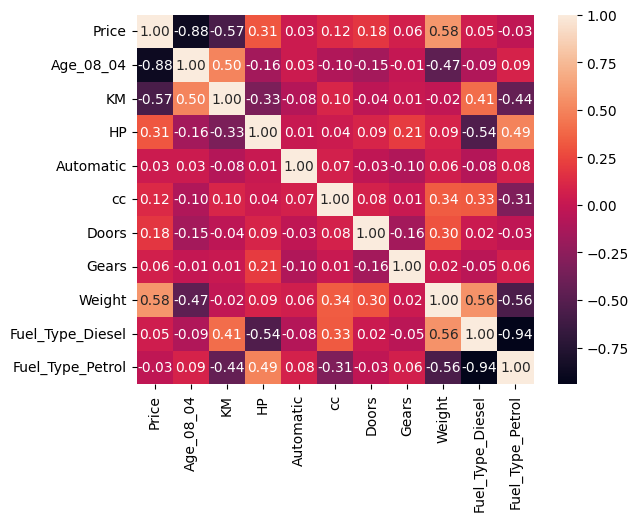

In [40]:
sea.heatmap(data_no_duplicates_05.corr(), annot = True, fmt = '.2f')
plt.show()

Based on the variance inflation factor and heatmap, there are few variables with high VIF especially Gears and Weights. But based on the heatmap, these two variables are not correlated. However, Age and KM are moderatly correlated similar to Fuel type Petrol and HP, KM and Fuel type Diesel, cc and weight, cc and Feul type Diesel. Fuel type Diesel and weight are strongly correlated. Overall more analysis is required to address multicollinearity issue.

QQ plots mainly help to check if the residuals are normally distributed, but they also some hints for multicollinearity when there are some patterns or deviations from normal distribution.

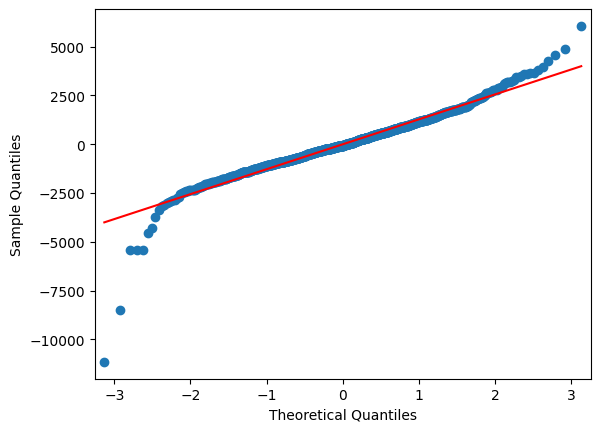

In [41]:
import statsmodels.api as sma
sma.qqplot(mlr05.resid, line = 'r')
plt.show()

The qq plot shows that the central part of the plot aligns well with the red line and the residuals are normally distributed. However, at the tail there are deviations may be due to outliers in the data, or non-linear relationship between variables, or Heteroscedasticity, where variance of residuals increases with certain predictors.

From the visualizations performed earlier, we know there are outliers in the dataset. Hence, a model that is not sensitive to outliers may be a good choise.

**Standardization** of dataset is important because it facilitates the understanding of how the dependent variable will change measured in SD for one SD increase or decrease of the independent variables.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_no_duplicates_05_scaled = scaler.fit_transform(data_no_duplicates_05)
data_no_duplicates_05_scaled = pd.DataFrame(data_no_duplicates_05_scaled, columns = data_no_duplicates_05.columns)
data_no_duplicates_05_scaled

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.770368,-1.777268,-0.575958,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.774964,2.884126,-2.718789
1,0.839669,-1.777268,0.116474,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.774964,2.884126,-2.718789
2,0.895109,-1.723380,-0.716707,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.774964,2.884126,-2.718789
3,1.172311,-1.615603,-0.548902,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.774964,2.884126,-2.718789
4,0.839669,-1.400049,-0.802384,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.870688,2.884126,-2.718789
...,...,...,...,...,...,...,...,...,...,...,...
1430,-0.892845,0.701602,-1.281492,-1.034441,-0.242983,-0.651898,-1.084443,-0.140475,-0.905299,-0.346726,0.367811
1431,0.034396,0.863267,-1.322689,-1.034441,-0.242983,-0.651898,-1.084443,-0.140475,-1.096747,-0.346726,0.367811
1432,-0.615643,0.809379,-1.375627,-1.034441,-0.242983,-0.651898,-1.084443,-0.140475,-1.096747,-0.346726,0.367811
1433,-0.962145,0.755490,-1.378295,-1.034441,-0.242983,-0.651898,-1.084443,-0.140475,-1.096747,-0.346726,0.367811


In [43]:
X_train_05_s, x_test_05_s, Y_train_05_s, y_test_05_s = tts(data_no_duplicates_05_scaled.drop('Price', axis = 1), data_no_duplicates_05_scaled['Price'], test_size = 0.2, random_state = 42)
X_train_05_s.shape, Y_train_05_s.shape, x_test_05_s.shape, y_test_05_s.shape

data_train_05_s, data_test_05_s = tts(data_no_duplicates_05_scaled, test_size = 0.2, random_state = 42)

In [44]:
mlr05_s_lr = LinearRegression()
mlr05_s_lr.fit(X_train_05_s, Y_train_03)

y_pred_train_05_s_lr = mlr05_s_lr.predict(X_train_05_s)
y_pred_test_05_s_lr = mlr05_s_lr.predict(x_test_05_s)

print('Coefficient : ', [round(coef, 2) for coef in mlr05_s_lr.coef_])

print('R2 : ', round(metrics.r2_score(Y_train_03, y_pred_train_05_s_lr), 4))
# print('Mean Absolute Error : ', round(metrics.mean_absolute_error(y_test_05_s, y_pred_test_05_s_lr), 4))
# MSE_05_s_lr = metrics.mean_squared_error(y_test_05_s, y_pred_test_05_s_lr)
# print('Mean Squared Error : ', round(MSE_05_s_lr, 4))
# print('Root Mean Squared Error : ', round(np.sqrt(MSE_05_s_lr), 4))
# print('Average Price in the test data is : ', round(np.mean(y_test_05_s), 4))
# print('Typical error in the model mlr05_s_lr is (Normalized Root Mean Squared Error) : ', '\n', round((np.sqrt(MSE_05_s_lr) / np.mean(y_test_05_s)), 4), '% of the average price')

Coefficient :  [np.float64(-2249.63), np.float64(-599.54), np.float64(240.75), np.float64(61.68), np.float64(-19.99), np.float64(-83.9), np.float64(85.77), np.float64(1376.94), np.float64(-120.61), np.float64(365.75)]
R2 :  0.8706


In [45]:
#mlr05_s = sm.ols(formula = 'Price ~ Age_08_04	+ KM + HP	+ Automatic	+ cc + Doors + Gears + Weight + Fuel_Type_Diesel + Fuel_Type_Petrol', data = data_no_duplicates_05_scaled).fit()

mlr05_s = sm.ols(formula = 'Price ~ Age_08_04	+ KM + HP	+ Automatic	+ cc + Doors + Gears + Weight + Fuel_Type_Diesel + Fuel_Type_Petrol', data = data_train_05_s).fit()
mlr05_s.summary()

#y_pred_test_05_s = mlr05_s.predict(x_test_05_s)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     765.0
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:31:04   Log-Likelihood:                -466.29
No. Observations:                1148   AIC:                             954.6
Df Residuals:                    1137   BIC:                             1010.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0011      0.011      0.099      0.921      -0.020       0.022
Age_08_04           -0.6236      0.015    -41.754      0.000      -0.653      -0.594
KM                  -0.1662      0.015    -10.881      0.000      -0.196      -0.136
HP                   0.0667      0.017      4.025      0.000       0.034       0.099
Automatic            0.0171      0.012      1.465      0.143      -0.006       0.040
cc                  -0.0055      0.011     -0.517      0.605      -0.027       0.015
Doors               -0.0233      0.012     -1.947      0.052      -0.047       0.000
Gears                0.0238      0.012      1.983      0.048       0.000       0.047
Weight               0.3817      0.022     17.577      0.000       0.339       0.424
Fuel_Type_Diesel    -0.0334      0.037     -0.908      0.364      -0.106       0.039
Fuel_Type_Petrol     0.1014      0.034      2.956      0.003       0.034       0.169
==============================================================================
Omnibus:                      231.718   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2442.134
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                      10.042   Cond. No.                         7.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model 6**: Ridge Regression

In [46]:
from sklearn.linear_model import Ridge, Lasso

In [47]:
X_train_06, x_test_06, Y_train_06, y_test_06 = tts(data_no_duplicates_05.drop('Price', axis = 1), data_no_duplicates_05['Price'], test_size = 0.2, random_state = 42)
X_train_06.shape, Y_train_06.shape, x_test_06.shape, y_test_06.shape

((1148, 10), (1148,), (287, 10), (287,))

In [48]:
mlr06 = Ridge(alpha = 50.0)
mlr06.fit(X_train_06, Y_train_06)
y_pred_test_06 = mlr06.predict(x_test_06)

print('R2 : ', round(metrics.r2_score(y_test_06, y_pred_test_06), 4))
print('Mean Absolute Error : ', round(metrics.mean_absolute_error(y_test_06, y_pred_test_06), 4))
MSE_06 = metrics.mean_squared_error(y_test_06, y_pred_test_06)
print('Mean Squared Error : ', round(MSE_06, 4))
print('Root Mean Squared Error : ', round(np.sqrt(MSE_06), 4))
print('Average Price in the test data is : ', round(np.mean(y_test_06), 4))
print('Typical error in the model mlr06 is (Normalized Root Mean Squared Error) : ', '\n', round((np.sqrt(MSE_06) / np.mean(y_test_06)), 4), '% of the average price')

R2 :  0.8298
Mean Absolute Error :  986.1037
Mean Squared Error :  2041932.1112
Root Mean Squared Error :  1428.9619
Average Price in the test data is :  10696.3937
Typical error in the model mlr06 is (Normalized Root Mean Squared Error) :  
 0.1336 % of the average price


In [49]:
mlr06_s = Ridge(alpha = 1)
mlr06_s.fit(X_train_05_s, Y_train_03)

y_pred_test_06_s = mlr06_s.predict(x_test_05_s)

print('R2 : ', round(metrics.r2_score(y_test_03, y_pred_test_06_s), 4))
print('Mean Absolute Error : ', round(metrics.mean_absolute_error(y_test_03, y_pred_test_06_s), 4))
MSE_06_s = metrics.mean_squared_error(y_test_03, y_pred_test_06_s)
print('Mean Squared Error : ', round(MSE_06_s, 4))
print('Root Mean Squared Error : ', round(np.sqrt(MSE_06_s), 4))
print('Average Price in the test data is : ', round(np.mean(y_test_03), 4))
print('Typical error in the model mlr06_s is (Normalized Root Mean Squared Error) : ', '\n', round((np.sqrt(MSE_06_s) / np.mean(y_test_03)), 4))

R2 :  0.8206
Mean Absolute Error :  986.417
Mean Squared Error :  2152740.5618
Root Mean Squared Error :  1467.2221
Average Price in the test data is :  10696.3937
Typical error in the model mlr06_s is (Normalized Root Mean Squared Error) :  
 0.1372


In [50]:
mlr07 = Lasso(alpha = 0.1)
mlr07.fit(X_train_06, Y_train_06)
y_pred_test_07 = mlr07.predict(x_test_06)

print('R2 : ', round(metrics.r2_score(y_test_06, y_pred_test_07), 4))
print('Mean Absolute Error : ', round(metrics.mean_absolute_error(y_test_06, y_pred_test_07), 4))
MSE_07 = metrics.mean_squared_error(y_test_06, y_pred_test_07)
print('Mean Squared Error : ', round(MSE_07, 4))
print('Root Mean Squared Error : ', round(np.sqrt(MSE_07), 4))
print('Average Price in the test data is : ', round(np.mean(y_test_06), 4))
print('Typical error in the model mlr07 is (Normalized Root Mean Squared Error) : ', '\n', round((np.sqrt(MSE_07) / np.mean(y_test_06)), 4), '% of the average price')

R2 :  0.8204
Mean Absolute Error :  986.4225
Mean Squared Error :  2154744.0167
Root Mean Squared Error :  1467.9046
Average Price in the test data is :  10696.3937
Typical error in the model mlr07 is (Normalized Root Mean Squared Error) :  
 0.1372 % of the average price


In [51]:
mlr07_s = Lasso(alpha = 0.1)
mlr07_s.fit(X_train_05_s, Y_train_03)
y_pred_test_07_s = mlr07_s.predict(x_test_05_s)

print('R2 : ', round(metrics.r2_score(y_test_03, y_pred_test_07_s), 4))
print('Mean Absolute Error : ', round(metrics.mean_absolute_error(y_test_03, y_pred_test_07_s), 4))
MSE_07_s = metrics.mean_squared_error(y_test_03, y_pred_test_07_s)
print('Mean Squared Error : ', round(MSE_07_s, 4))
print('Root Mean Squared Error : ', round(np.sqrt(MSE_07_s), 4))
print('Average Price in the test data is : ', round(np.mean(y_test_03), 4))
print('Typical error in the model mlr07_s is (Normalized Root Mean Squared Error) : ', '\n', round((np.sqrt(MSE_07_s))/ np.mean(y_test_03), 4), '% of the average price')

R2 :  0.8204
Mean Absolute Error :  986.4638
Mean Squared Error :  2155209.7637
Root Mean Squared Error :  1468.0633
Average Price in the test data is :  10696.3937
Typical error in the model mlr07_s is (Normalized Root Mean Squared Error) :  
 0.1372 % of the average price


R2 :  0.8281
Mean Absolute Error :  981.9216
Mean Squared Error :  2062854.3642
Root Mean Squared Error :  1436.264
Average Price in the test data is :  10696.3937
Typical error in the model mlr07 is (Normalized Root Mean Squared Error) :  
 0.1372 % of the average price

In [52]:
from sklearn.linear_model import RidgeCV, LassoCV
# Define a range of alpha values to test
alphas = np.logspace(-4, 4, 100)  # Testing alphas from 0.0001 to 10000

# Ridge Regression with Cross-Validation
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_06, Y_train_06)
best_alpha_ridge = ridge_cv.alpha_
print(f"Optimal alpha for Ridge: {best_alpha_ridge}")

# Ridge Regression with Cross-Validation of standardized data
ridge_cv_s = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv_s.fit(X_train_05_s, Y_train_03)
best_alpha_ridge_s = ridge_cv_s.alpha_
print(f"Optimal alpha for Ridge: {best_alpha_ridge_s}")

# Lasso Regression with Cross-Validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train_06, Y_train_06)
best_alpha_lasso = lasso_cv.alpha_
print(f"Optimal alpha for Lasso: {best_alpha_lasso}")

# Lasso Regression with Cross-Validation od standardization od data
lasso_cv_s = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv_s.fit(X_train_05_s, Y_train_03)
best_alpha_lasso_s = lasso_cv_s.alpha_
print(f"Optimal alpha for Lasso: {best_alpha_lasso_s}")

Optimal alpha for Ridge: 10000.0
Optimal alpha for Ridge: 95.45484566618347
Optimal alpha for Lasso: 3944.206059437664
Optimal alpha for Lasso: 54.62277217684348


In [53]:
from sklearn.model_selection import cross_val_score

mlr03_estimator = LinearRegression()
mlr05_estimator = LinearRegression()
mlr06_estimator = Ridge(alpha = best_alpha_ridge)
mlr07_estimator = Lasso(alpha = best_alpha_lasso)
mlr06_estimator_s = Ridge(alpha = best_alpha_ridge_s)
mlr07_estimator_s = Lasso(alpha = best_alpha_lasso_s)

cv_score_mlr03 = cross_val_score(mlr03_estimator, X_train_03, Y_train_03, scoring = 'r2', cv = 5).mean()
cv_score_mlr05 = cross_val_score(mlr05_estimator, X_train_03, Y_train_03, scoring = 'r2', cv = 5).mean()
cv_score_mlr06 = cross_val_score(mlr06, X_train_06, Y_train_06, scoring = 'r2', cv = 5).mean()
cv_score_mlr07 = cross_val_score(mlr07, X_train_06, Y_train_06, scoring = 'r2', cv = 5).mean()
cv_score_mlr06_s = cross_val_score(mlr06_estimator_s, X_train_05_s, Y_train_03, scoring = 'r2', cv = 5).mean()
cv_score_mlr07_s = cross_val_score(mlr07_estimator_s, X_train_05_s, Y_train_03, scoring = 'r2', cv = 5).mean()

print('LR Cross-Validation R2 : ', round(cv_score_mlr03, 4))
print('OLS Cross-Validation R2 : ', round(cv_score_mlr05, 4))
print('Ridge Cross-Validation R2 : ', round(cv_score_mlr06, 4))
print('Lasso Cross-Validation R2 : ', round(cv_score_mlr07, 4))
print('Ridge Cross-Validation R2 standardized : ', round(cv_score_mlr06_s, 4))
print('Lasso Cross-Validation R2 standardized : ', round(cv_score_mlr07_s, 4), '\n')

print('LR Mean Absolute Error : ', round(mlr03_test_AbErr_test, 4))
print('OLS scaled Mean Absolute Error : ', round(metrics.mean_absolute_error(y_test_03, y_pred_test_03), 4))
print('Ridge Mean Absolute Error : ', round(metrics.mean_absolute_error(y_test_06, y_pred_test_06), 4))
print('Lasso Mean Absolute Error : ', round(metrics.mean_absolute_error(y_test_06, y_pred_test_07), 4))
print('Ridge Mean Absolute Error standardized: ', round(metrics.mean_absolute_error(y_test_06, y_pred_test_06_s), 4))
print('Lasso Mean Absolute Error standardized: ', round(metrics.mean_absolute_error(y_test_06, y_pred_test_07_s), 4), '\n')

print('LR Mean Squared Error : ', round(mlr03_test_SqErr_test, 4))
print('OLS scaled Mean Squared Error : ', round(metrics.mean_squared_error(y_test_03, y_pred_test_03), 4))
print('Ridge Mean Squared Error : ', round(MSE_06, 4))
print('Lasso Mean Squared Error : ', round(MSE_07, 4))
print('Ridge Mean Squared Error standardized: ', round(MSE_06_s, 4))
print('Lasso Mean Squared Error standardized: ', round(MSE_07_s, 4), '\n')

print('LR Root Mean Squared Error : ', round(mlr03_test_RootSqErr_test, 4))
print('OLS scaled Root Mean Squared Error : ', round(np.sqrt(metrics.mean_squared_error(y_test_03, y_pred_test_03)), 4))
print('Ridge Root Mean Squared Error : ', round(np.sqrt(MSE_06), 4))
print('Lasso Root Mean Squared Error : ', round(np.sqrt(MSE_07), 4))
print('Ridge Root Mean Squared Error standardized: ', round(np.sqrt(MSE_06_s), 4))
print('Lasso Root Mean Squared Error standardized: ', round(np.sqrt(MSE_07_s), 4), '\n')

print('LR Average Price in the test data is : ', round(np.mean(y_test_03), 4))
print('OLS scaled Average Price in the test data is : ', round(np.mean(y_test_03), 4))
print('Ridge Average Price in the test data is : ', round(np.mean(y_test_06), 4))
print('Lasso Aaverage Price in the test data is : ', round(np.mean(y_test_06), 4))
print('Ridge Average Price in the test data is : ', round(np.mean(y_test_06), 4))
print('Lasso Average Price in the test data is : ', round(np.mean(y_test_06), 4), '\n')

print('Typical error in the model mlr03 (LR) is (Normalized Root Mean Squared Error) : ', '\n', round((mlr03_test_RootSqErr_test / np.mean(y_test_03)), 4), '% of the average price')
print('Typical error in the model mlr05 (OLS) is (Normalized Root Mean Squared Error) : ', '\n', round((np.sqrt(MSE_04) / np.mean(data_test_04['Price'])), 4), '% of the average price')
print('Typical error in the model mlr06 (Ridge) is (Normalized Root Mean Squared Error) : ', '\n', round((np.sqrt(MSE_06) / np.mean(y_test_06)), 4), '% of the average price')
print('Typical error in the model mlr07 (Lasso) is (Normalized Root Mean Squared Error) : ', '\n', round((np.sqrt(MSE_07) / np.mean(y_test_06)), 4), '% of the average price')
print('Typical error in the model mlr06_s (Ridge) is (Normalized Root Mean Squared Error) : ', '\n', round((np.sqrt(MSE_06_s) / np.mean(y_test_06)), 4), '% of the average price')
print('Typical error in the model mlr07_s (Lasso) is (Normalized Root Mean Squared Error) : ', '\n', round((np.sqrt(MSE_07_s) / np.mean(y_test_06)), 4), '% of the average price')

LR Cross-Validation R2 :  0.7186
OLS Cross-Validation R2 :  0.7186
Ridge Cross-Validation R2 :  0.7991
Lasso Cross-Validation R2 :  0.7197
Ridge Cross-Validation R2 standardized :  0.8516
Lasso Cross-Validation R2 standardized :  0.8549 

LR Mean Absolute Error :  986.4967
OLS scaled Mean Absolute Error :  986.4967
Ridge Mean Absolute Error :  986.1037
Lasso Mean Absolute Error :  986.4225
Ridge Mean Absolute Error standardized:  986.417
Lasso Mean Absolute Error standardized:  986.4638 

LR Mean Squared Error :  2155628.3561
OLS scaled Mean Squared Error :  2155628.3561
Ridge Mean Squared Error :  2041932.1112
Lasso Mean Squared Error :  2154744.0167
Ridge Mean Squared Error standardized:  2152740.5618
Lasso Mean Squared Error standardized:  2155209.7637 

LR Root Mean Squared Error :  1468.2058
OLS scaled Root Mean Squared Error :  1468.2058
Ridge Root Mean Squared Error :  1428.9619
Lasso Root Mean Squared Error :  1467.9046
Ridge Root Mean Squared Error standardized:  1467.2221
Las

Based on the comparision of different models, Ridge and Lasso standardized models mlr06_s and mlr07_s performs better as Cross-validation R2 is higher, and with respect to MSE, RMSE, Mean Absolute error Ridge model (unscaled) is better as these values are lower comparitively. The Normalized Root Mean Squared Error is a bit higher but this is negligible as per other parameters Ridge model (unscaled) is the better option for predicting the price of Toyota Corolla.

**Data Visualization of outputs**

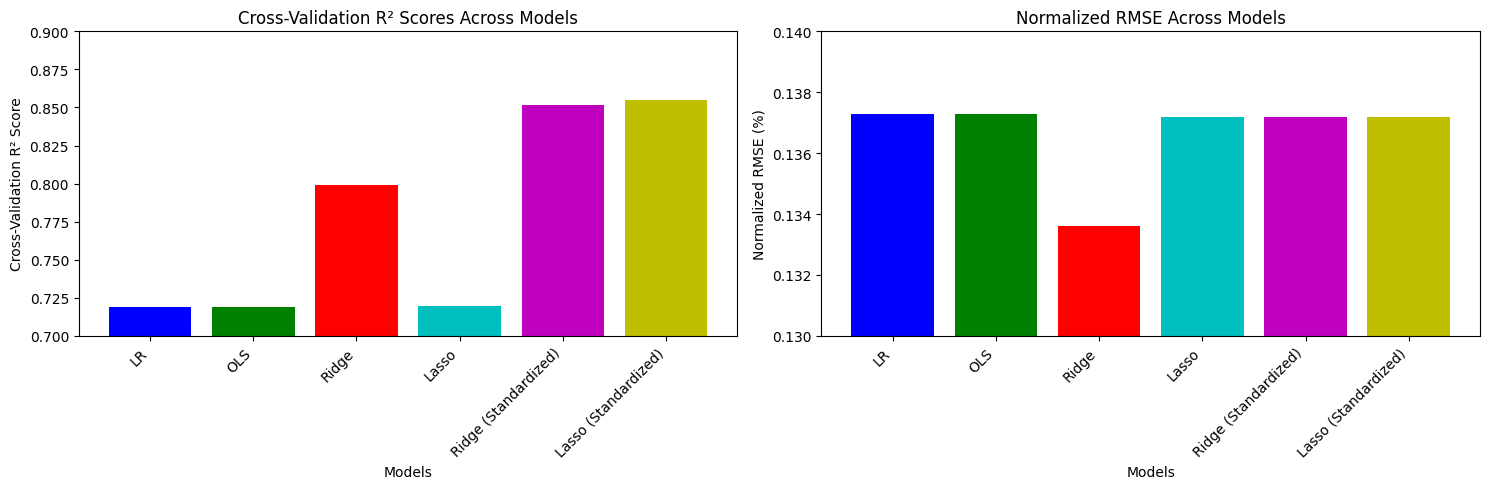

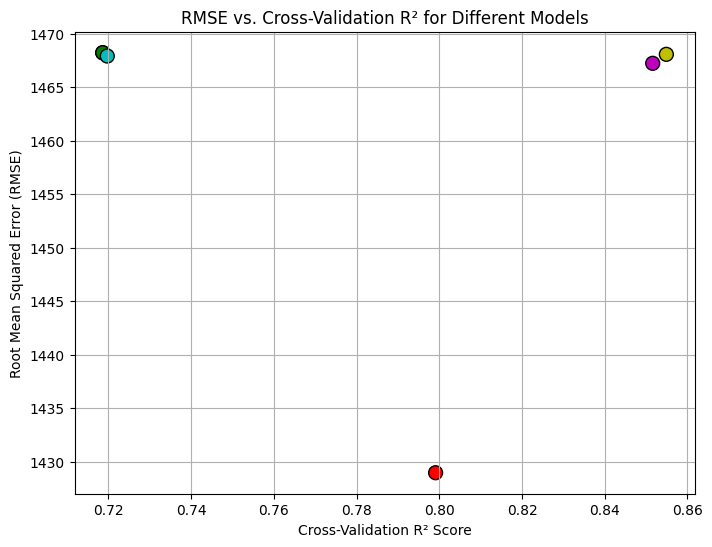

In [54]:
# Model names
models = [
    "LR", "OLS", "Ridge", "Lasso", "Ridge (Standardized)", "Lasso (Standardized)"
]

# Cross-Validation R² scores
cv_r2 = [0.7186, 0.7186, 0.7991, 0.7197, 0.8516, 0.8549]

# Normalized RMSE (%) values
normalized_rmse = [0.1373, 0.1373, 0.1336, 0.1372, 0.1372, 0.1372]

# RMSE values for Scatter Plot
rmse = [1468.21, 1468.21, 1428.96, 1467.90, 1467.22, 1468.06]

# Plotting Bar Plot for Cross-Validation R²
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(models, cv_r2, color=['b', 'g', 'r', 'c', 'm', 'y'])
plt.title('Cross-Validation R² Scores Across Models')
plt.xlabel('Models')
plt.ylabel('Cross-Validation R² Score')
plt.xticks(rotation=45, ha="right")
plt.ylim(0.7, 0.9)

# Plotting Bar Plot for Normalized RMSE
plt.subplot(1, 2, 2)
plt.bar(models, normalized_rmse, color=['b', 'g', 'r', 'c', 'm', 'y'])
plt.title('Normalized RMSE Across Models')
plt.xlabel('Models')
plt.ylabel('Normalized RMSE (%)')
plt.xticks(rotation=45, ha="right")
plt.ylim(0.13, 0.14)

plt.tight_layout()
plt.show()

# Plotting Scatter Plot for RMSE vs. Cross-Validation R²
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']

plt.scatter(cv_r2, rmse, c=colors, s=100, edgecolor='k')
#for i, model in enumerate(models):
#    plt.annotate(model, (cv_r2[i] + 0.001, rmse[i] - 5))

plt.title('RMSE vs. Cross-Validation R² for Different Models')
plt.xlabel('Cross-Validation R² Score')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.show()

Based on these plots, **Ridge model (scaled)** mlr06_s appears to be better suited as cross-validation R2 is higher while other error metrics are not too large either.

**Interview Questions:**
1.What is Normalization & Standardization and how is it helpful?

  * Normalization and Standardization are both techniques used to rescale the features of a dataset. They are often called Feature Scaling. The core idea is to bring all the features onto a similar scale without distorting the differences in the ranges of values.

  * Normalization (Min-Max Scaling)

    * This technique rescales the data to a fixed range, usually [0, 1]. It's done by subtracting the minimum value and dividing by the range (max - min).

    * It is used:
    
      * When you know the distribution of your data is not Gaussian (not a bell curve).

      * When you need the data to be bounded in a specific range.

    * Sensitive to Outliers: A single outlier can squeeze the normalized data into a very small range.

  * Standardization (Z-Score Normalization)

    * This technique rescales the data to have a mean of 0 and a standard deviation of 1. It doesn't bound the data to a specific range.  

    * It is used:

      * When the data follows a Gaussian distribution.

      * When the algorithm like PCA assumes the data is centered around zero.

    * Sensitive to Outliers: It is much less sensitive to outliers compared to Min-Max scaling.

2.What techniques can be used to address multicollinearity in multiple linear regression?

  * Multicollinearity occurs when two or more independent variables (features) in a regression model are highly correlated.

  * Techniques to Address Multicollinearity

    * *Remove Highly Correlated Features*: Calculate the correlation matrix. Identify pairs of features with a correlation coefficient above a certain threshold (e.g., 0.8 or 0.9). Remove one of the two correlated features. One disadvantage is the lose of information because of deciding to remove a feature maybe be arbitrary.

    * *Feature Engineering*: Combine the correlated variables to create a new, more meaningful feature.

    * *Principal Component Analysis (PCA)*: It transforms the original correlated features into a new set of uncorrelated features called principal components. These components are linear combinations of the original features and are orthogonal to each other (completely uncorrelated). You then use these components for regression. One advantage is Completely eliminates multicollinearity, however, the resulting principal components are often difficult to interpret, as they no longer represent the original features.

    * *Ridge Regression (L2 Regularization)*: This adds a "penalty" to the model's loss function that is proportional to the square of the coefficients (L2 penalty). This penalty shrinks the coefficients of the correlated variables, making the model more robust and stable. An advantage is it keeps all features in the model, but it does not perform feature selection and also introduces a hyperparameter (alpha) that needs to be tuned.